In [37]:
from IPython.display import display, HTML
p="Minimal Ratio:"
html_markup="<h1>" +p+ "</h1>"
display(HTML(html_markup))

Length of x_data: (300, 1)
Length of y_data: (300, 1)


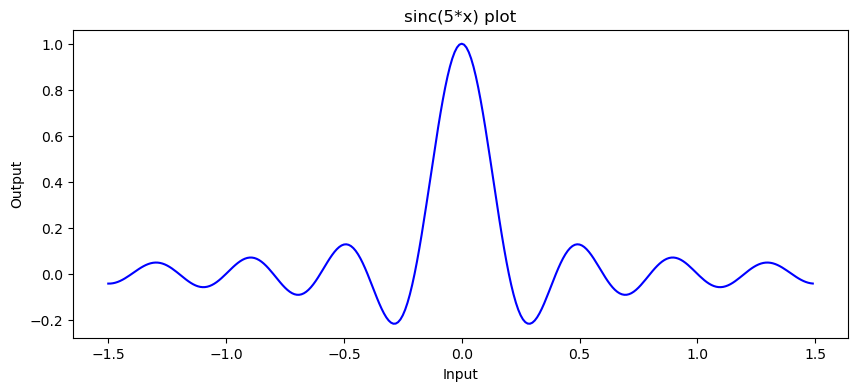

Training model  0
Beginning training
Gradient norm reached minimum value
Minimal Ratio -  0.5034965034965035  , Loss -  0.06130607  Epoch -  69
Training Completed
Training model  1
Beginning training
Gradient norm reached minimum value
Minimal Ratio -  0.5244755244755245  , Loss -  0.0035948635  Epoch -  563
Training Completed
Training model  2
Beginning training
Gradient norm reached minimum value
Minimal Ratio -  0.4982517482517482  , Loss -  0.061288062  Epoch -  43
Training Completed
Training model  3
Beginning training
Gradient norm reached minimum value
Minimal Ratio -  0.5314685314685315  , Loss -  0.0021863675  Epoch -  540
Training Completed
Training model  4
Beginning training
Gradient norm reached minimum value
Minimal Ratio -  0.534965034965035  , Loss -  0.0021622695  Epoch -  1171
Training Completed
Training model  5
Beginning training
Gradient norm reached minimum value
Minimal Ratio -  0.5437062937062938  , Loss -  0.0017037077  Epoch -  965
Training Completed
Training 

Gradient norm reached minimum value
Minimal Ratio -  0.5402097902097902  , Loss -  0.0013259497  Epoch -  1154
Training Completed
Training model  51
Beginning training
Gradient norm reached minimum value
Minimal Ratio -  0.5052447552447552  , Loss -  0.06129004  Epoch -  107
Training Completed
Training model  52
Beginning training
Gradient norm reached minimum value
Minimal Ratio -  0.5034965034965035  , Loss -  0.061279736  Epoch -  112
Training Completed
Training model  53
Beginning training
Gradient norm reached minimum value
Minimal Ratio -  0.5437062937062938  , Loss -  0.001041846  Epoch -  3941
Training Completed
Training model  54
Beginning training
Gradient norm reached minimum value
Minimal Ratio -  0.5017482517482518  , Loss -  0.06128986  Epoch -  108
Training Completed
Training model  55
Beginning training
Gradient norm reached minimum value
Minimal Ratio -  0.5332167832167832  , Loss -  0.0017642402  Epoch -  1366
Training Completed
Training model  56
Beginning training
G

In [43]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

## Function 1  ###
x_data = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)

# Choosing sin(x) as a nonlinear function
y_data = np.sinc(5*x_data)

print('Length of x_data:', x_data.shape)
print('Length of y_data:', y_data.shape)



# Convert np arr to tensors
x = torch.tensor(x_data, dtype=torch.float32)
y = torch.tensor(y_data, dtype=torch.float32)

# Graph for the function
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "blue")
plt.title('sinc(5*x) plot')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear_1 = nn.Linear(1, 4)
        self.linear_2 = nn.Linear(4, 9)
        self.linear_3 = nn.Linear(9, 12)
        self.linear_4 = nn.Linear(12, 10)
        self.linear_5 = nn.Linear(10, 10)
        self.linear_6 = nn.Linear(10, 10)
        self.linear_7 = nn.Linear(10, 4)
        self.predict = nn.Linear(4, 1)
    
    def forward(self, x):
        x = nn.functional.leaky_relu(self.linear_1(x))
        x = nn.functional.leaky_relu(self.linear_2(x))
        x = nn.functional.leaky_relu(self.linear_3(x))
        x = nn.functional.leaky_relu(self.linear_4(x))
        x = nn.functional.leaky_relu(self.linear_5(x))
        x = nn.functional.leaky_relu(self.linear_6(x))
        x = nn.functional.leaky_relu(self.linear_7(x))
        x = self.predict(x)
        return x

def train_model(model, x, y):
    epoch_size = 4000
    loss_arr = []
    epoch_arr = []
    grad_arr = []
    converged = False
    min_grad = 0
    loss_val = 0
    minimal_ratio = 0  # Default value for minimal_ratio
    print('Beginning training')
    
    for epoch in range(epoch_size):
        if converged:
            return epoch_arr, loss_arr, y_prediction, grad_arr

        y_prediction = model(x)
        loss_val = 0.001
        loss = loss_func(y_prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        # Calculate the gradient
        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy() ** 2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        
        grad_arr.append(grad_norm)
        
        total_params = sum(p.numel() for p in model.parameters())
        if grad_norm < 0.001 or epoch == epoch_size:
            print('Gradient norm reached minimum value')
            predicted_y = model(x)
            lossm = loss_func(predicted_y, y)
            H = torch.zeros((total_params, total_params))

            J = torch.autograd.grad(lossm, list(model.parameters()), create_graph=True)
            J = torch.cat([e.flatten() for e in J])  # flatten
            for i in range(total_params):
                result = torch.autograd.grad(J[i], list(model.parameters()), retain_graph=True)
                H[i] = torch.cat([r.flatten() for r in result])  # flatten
            H_eig = torch.linalg.eigvalsh(H, UPLO='U')  # Using torch.linalg.eigvalsh
            positive_count = 0
            for i in H_eig.tolist():
                if i > 0:
                    positive_count += 1
            minimal_ratio = positive_count / H.shape[0]
            print('Minimal Ratio - ', minimal_ratio, ' , Loss - ', lossm.data.detach().numpy(), ' Epoch - ', epoch)
            loss_val = lossm.data.detach().numpy()
            break
            
    print('Training Completed')
    return loss_val, minimal_ratio

loss_arr = []
min_ratio_arr = []

for index in range(100):
    print("Training model ", index)
    model = Model()
    loss_func = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

    loss_value, min_ratio = train_model(model, x, y)  # Unpack only necessary return values
    loss_arr.append(loss_value)
    min_ratio_arr.append(min_ratio)


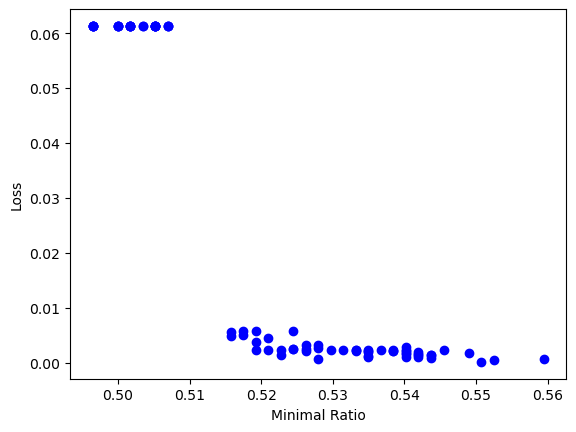

In [42]:
plt.scatter(min_ratio_arr,loss_arr, color = "blue")
plt.xlabel("Minimal Ratio")
plt.ylabel("Loss")
plt.show()